# 결정 트리

In [1]:
#화이트 와인: 양성 

import pandas as pd
import numpy as np

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
wine.isnull().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [5]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

# 로지스틱 회귀로 와인 분류하기

In [6]:
data=wine[['alcohol', 'sugar', 'pH']].to_numpy()
target=wine['class'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target,test_target=train_test_split(data,target,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)

train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [9]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(train_scaled,train_target)

print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7859195402298851
0.7655384615384615


In [10]:
print(lr.coef_,lr.intercept_)

[[ 0.53273869  1.67940585 -0.7090217 ]] [1.84713933]


# 결정트리

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(train_scaled,train_target)

print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.9973316912972086
0.8541538461538462


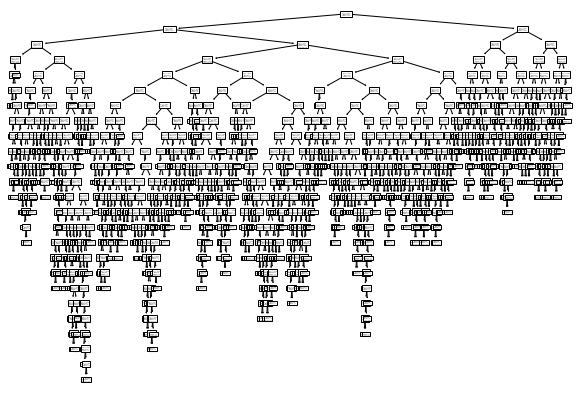

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

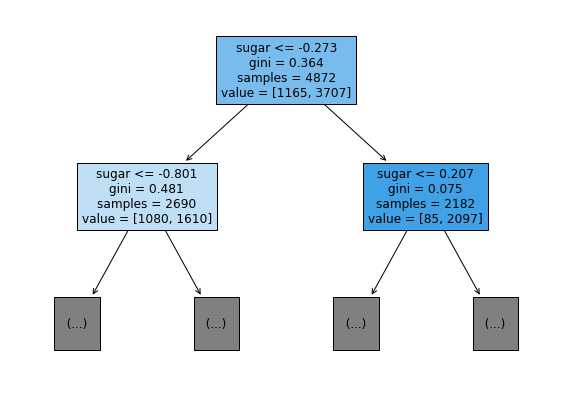

In [13]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1,filled=True,feature_names=['alchol','sugar','pH'])
plt.show() 
#filled는 색을 칠함

# 지니 불순도

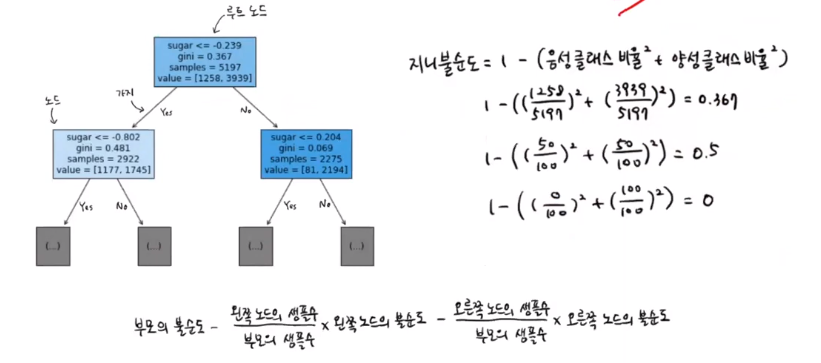

# 가지치기

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=3,random_state=42)

dt.fit(train_scaled,train_target)

print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8499589490968801
0.8363076923076923


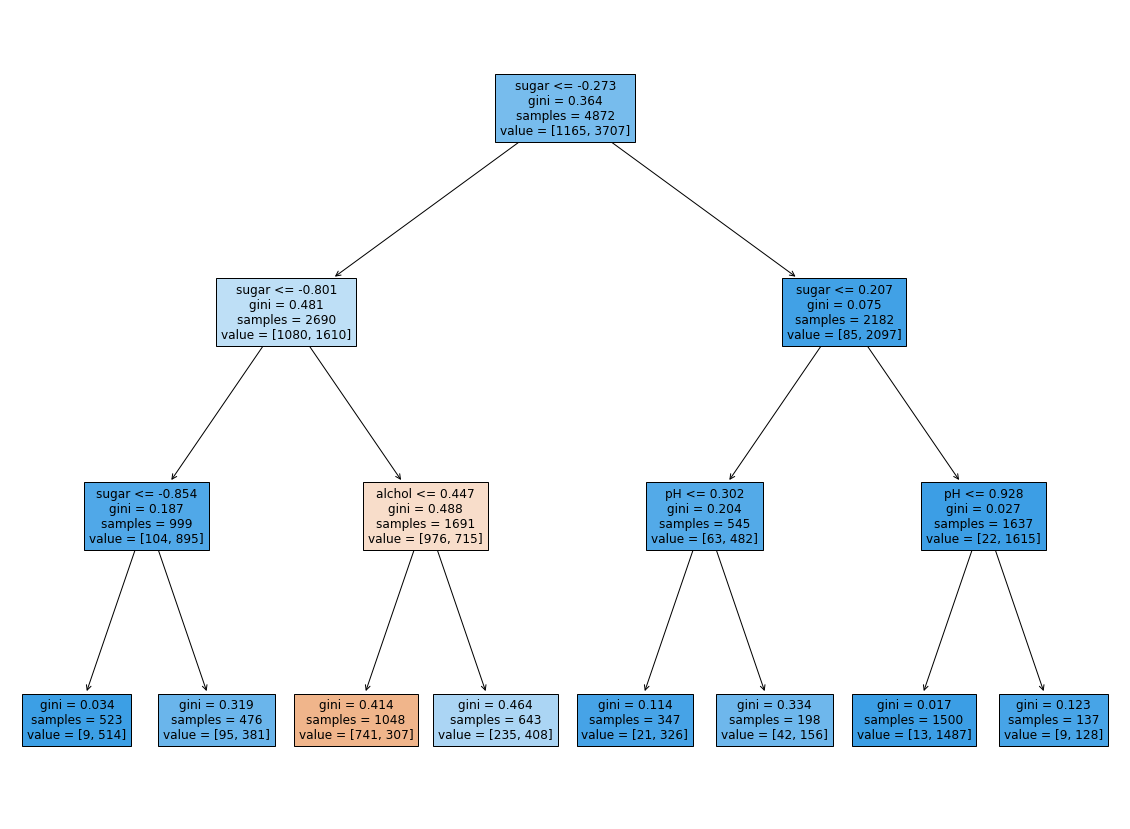

In [15]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alchol','sugar','pH'])
plt.show()

In [16]:
# 스케일 조정하지 않은 특성 사용하기

0.8499589490968801
0.8363076923076923


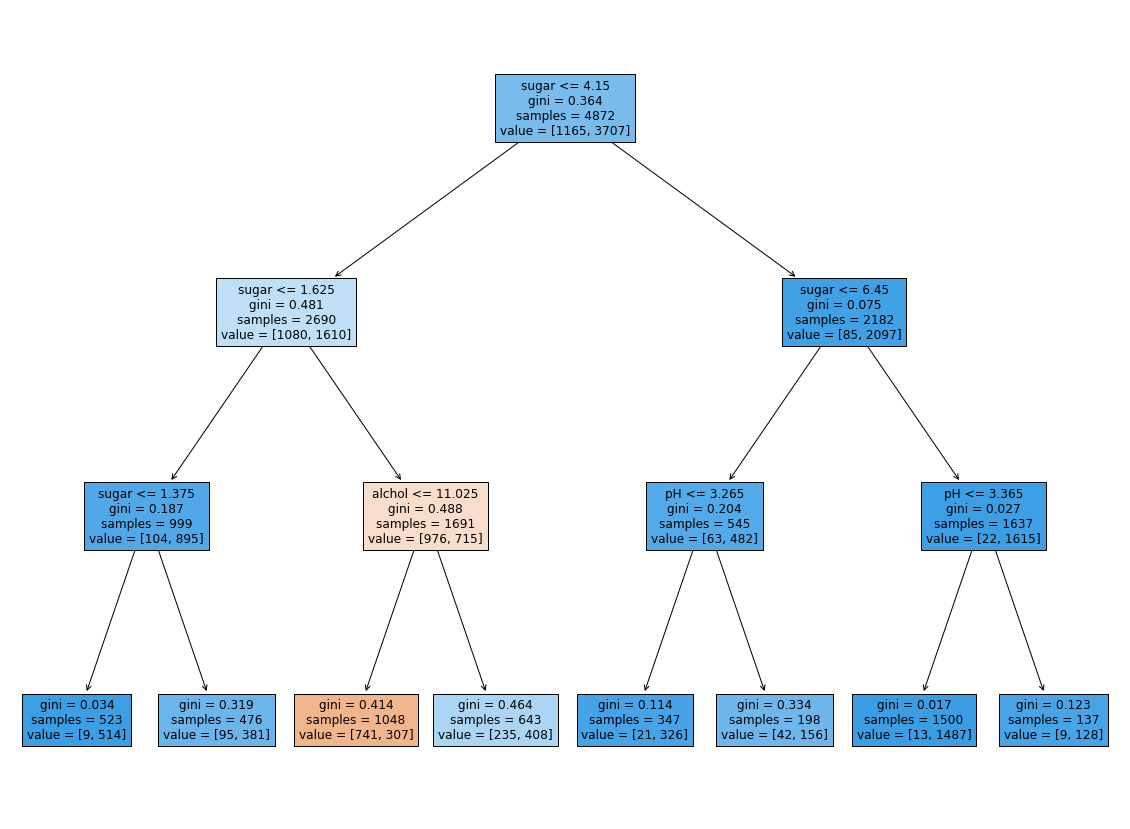

In [19]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input,train_target)

print(dt.score(train_input,train_target)) #train_scaled 아니여도 같은 값이 나옴
print(dt.score(test_input,test_target))

plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alchol','sugar','pH'])
plt.show()

In [20]:
print(dt.feature_importances_) #sugar가 가장 중요, #너무 깊이를 깊게 하면 과적합.

[0.12871631 0.86213285 0.00915084]
